---

# Train, Test and Evaluate a Regression Model 

---

#### Don't forget to fill out your notebook and send it at the end of the session to Nourhene.Ben-Rabah@univ-paris1.fr


# Dataset 
In this notebook, we will use the **steel industry energy consumption dataset**. This is one of the most recently published datasets that integrates energy consumption data collected using several IoT devices from a small smart steel industry in South Korea. The steel industry produces several types of coils, steel plates and iron plates. 



# Define task 
The task is to make prediction about the energy consumption of the steel industry from a set of metrics. The Usage_kWh is the target variable that ML models must predict.

# Information About Dataset


In [ ]:
!pip install "numpy<2"

In [9]:
import pandas as pnd
df_steel = pnd.read_csv("./Dataset/Steel_industry_data.csv")
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [10]:
df_steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


# Data transformation 
 Define the DataFrame index using the date column 

In [5]:
df_steel = df_steel.set_index('date')
df_steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


The data to be analyzed consists of two types: numerical data and categorical data (object type). Most ML models require that the categorical data must be in a numeric format to work properly. Therefore, it is important to convert data of type object  into *numerical values*, which is called encoding.

You have already seen an encoder of type *One Hot* and now you will see another one of type *Label Encoder* 
We have 3 columns to encode: WeekStatus, Day_of_week and Load_Type    

In [6]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode the WeekStatus
df_steel['WeekStatus']= label_encoder.fit_transform(df_steel['WeekStatus'])
df_steel['WeekStatus'].unique()
df_steel. head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,Monday,Light_Load


**c) Encode the other columns**

**d) So, what is the principle of label Encoder** 

**e) What are the limitations of Label Encoder** 

In [7]:
#Encode the others columns
df_steel['Day_of_week']= label_encoder.fit_transform(df_steel['Day_of_week'])
df_steel['Day_of_week'].unique()

df_steel['Load_Type']= label_encoder.fit_transform(df_steel['Load_Type'])
df_steel['Load_Type'].unique()


array([0, 2, 1])

In [8]:
df_steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


**f) Now use the One hot encoder** 

In [11]:
colonnes_a_encoder = ['Load_Type', 'Day_of_week', 'WeekStatus']
df_encoded = pnd.get_dummies(df_steel, columns=colonnes_a_encoder)
df_encoded

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,True,False,False,False,True,False,False,False,False,False,True,False
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,True,False,False,False,True,False,False,False,False,False,True,False
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,True,False,False,False,True,False,False,False,False,False,True,False
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,True,False,False,False,True,False,False,False,False,False,True,False
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,True,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,True,False,False,False,True,False,False,False,False,False,True,False
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,True,False,False,False,True,False,False,False,False,False,True,False
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,True,False,False,False,True,False,False,False,False,False,True,False
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,True,False,False,False,True,False,False,False,False,False,True,False


# Split Data to Train and Test 

#  Data scaling
The final step (optional) before the data is passed to ML algorithms is to scale the data. You can see that some columns of the dataset contain small values, while the others contain very large values. It is better to convert all values to
a uniform scale. 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
y = df_encoded['Usage_kWh']
X = df_encoded.drop(['date', 'Usage_kWh'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train models
**g) Start by creating, training and evaluating the algorithms seen in the course: LinearRegression and Decision Tree Regressor**

Use the *Mean Absolute Error (MAE)*, *training time* and *prediction time* to evaluate the models performance

*MAE* is the mean of the absolute values of the individual prediction errors on all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance. The closer the measure is to zero, the better the performance, while the higher the measure, the worse the performance.

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

y_pred2 = clf.predict(X_test)

Let's visualize the linear regression model 

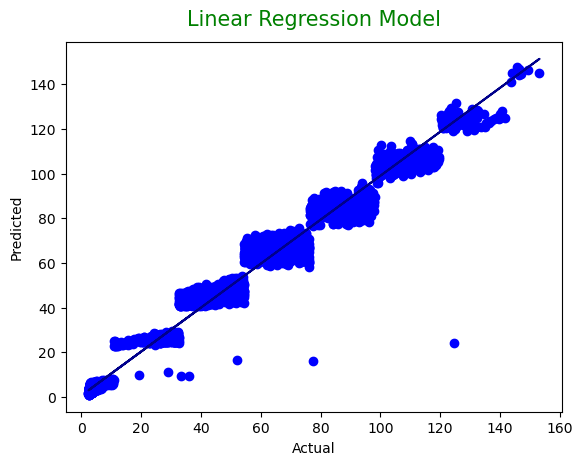

In [22]:
import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**h) Let's visualize the Decision Tree model** 

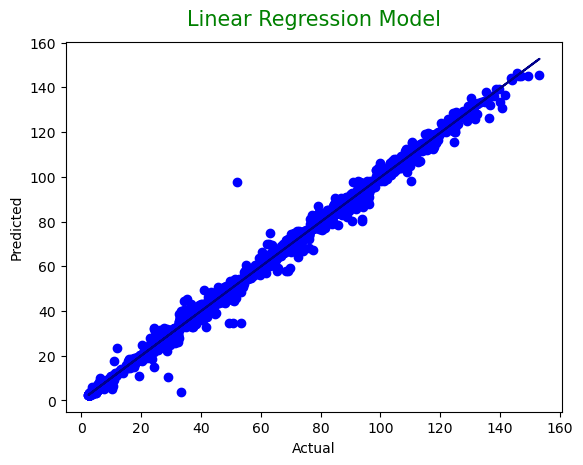

In [27]:
import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred2
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**j) You will now test other regression algorithms such as KNN, Random Forest and SVR**

**k) Compare the performance of these models and determine the best model**

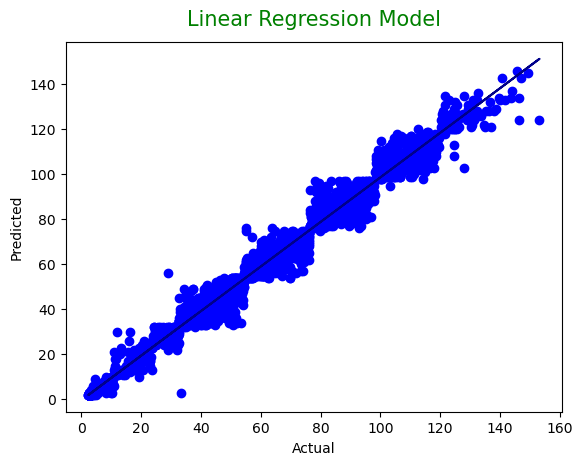

In [45]:
from sklearn.ensemble import RandomForestClassifier
y_train = y_train.astype('int')

rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

y_pred4 = rf.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred4
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


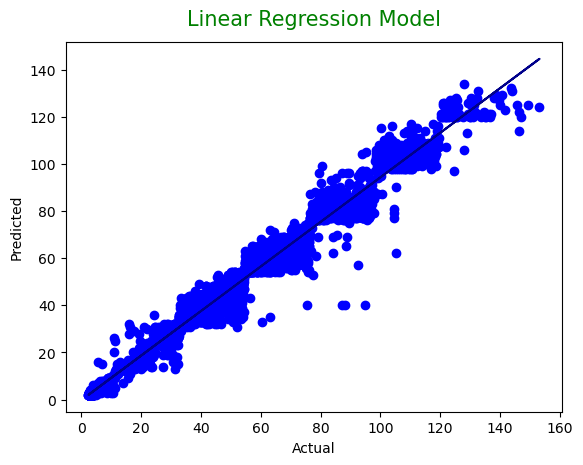

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred3
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

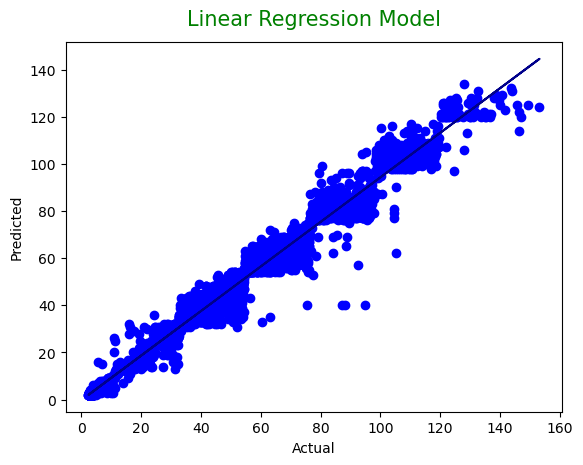

In [34]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_pred5 = knn.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred5
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error Linear Regression:", mae)

mae2 = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error Decision Tree Regression:", mae2)

mae3 = mean_absolute_error(y_test,y_pred3)
print("Mean Absolute Error KNN:", mae3)

mae4 = mean_absolute_error(y_test,y_pred4)
print("Mean Absolute Error Random Forest:", mae4)

mae5 = mean_absolute_error(y_test,y_pred5)
print("Mean Absolute Error SVR:", mae5)

Mean Absolute Error Linear Regression: 2.5337743872429734
Mean Absolute Error Decision Tree Regression: 0.5326526826484018
Mean Absolute Error KNN: 2.30308647260274
Mean Absolute Error Random Forest: 1.579396404109589
Mean Absolute Error SVR: 2.30308647260274


# Iterate!
At this point, you can go back to the previous steps to try to make improvements to the model (consider changing the hyperparameters of the models).


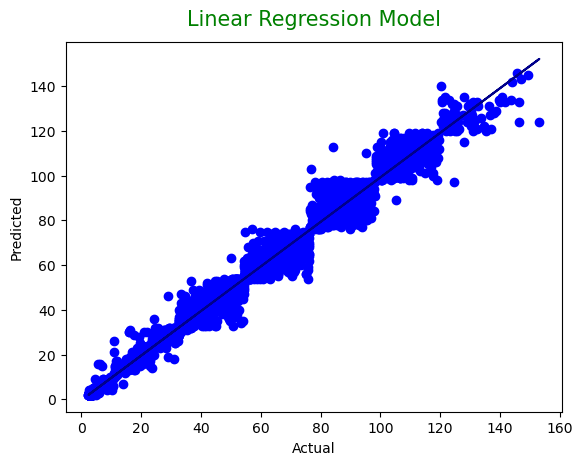

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred6 = knn.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred6
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
mae6 = mean_absolute_error(y_test,y_pred6)
print("Mean Absolute Error SVR:", mae6)

# Exercice 
Using the Diamonds dataset, train a regression algorithm of your choice, which predicts the price of the diamond.
Perform all the preprocessing steps.